# Conjugate gradients

When $A$ is hermitian and positive definite, a famous method is available: *conjugate gradients*. There is a lot to say about CG overall, but to us it is mainly a Krylov subspace method that minimizes a quantity other than the residual over the reduced subspace $\mathcal{K}_n$. This quantity is $\|\epsilon_n\|_A$, where $\epsilon_n=A^{-1}b-x_n$ is the error and the norm is defined by $\|u\|_A^2=u^*Au$. 

We won't use the iteration formulas here, just a canned implementation from [IterativeSolvers.jl](https://juliamath.github.io/IterativeSolvers.jl/latest/).

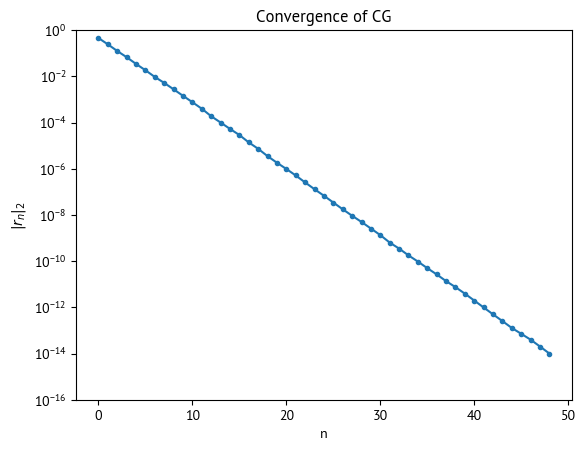

In [1]:
using IterativeSolvers,LinearAlgebra,SparseArrays,PyPlot
m = 500;
kappa = 10;
lam = range(1,stop=kappa,length=m)
A = spdiagm(0=>lam)
b = normalize(randn(m))

x,hist = cg(A,b,tol=1e-14,maxiter=100,log=true);
semilogy(hist[:resnorm],".-");
ylim(1e-16,1);
xlabel("n");
title("Convergence of CG");
ylabel(L"\|r_n\|_2");

In this simple problem, we can calculate the true solution and therefore the error as well.

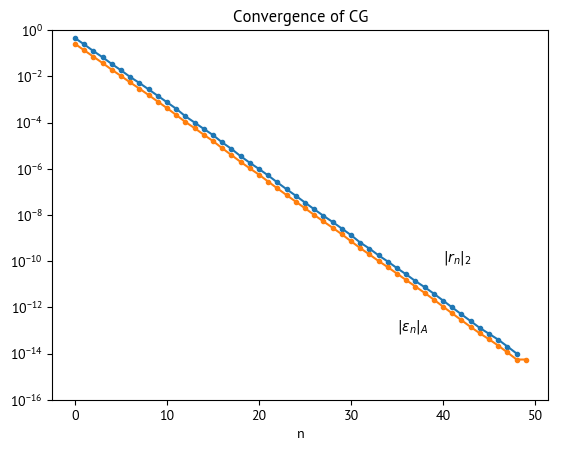

In [2]:
x = b./diag(A);
Anorm(x) = sqrt(dot(x,A*x));
Aerr = zeros(50)
for n = 1:50
    xx = cg(A,b,tol=1e-14,maxiter=n)
    Aerr[n] = Anorm(x-xx)
end

semilogy(hist[:resnorm],".-");
semilogy(Aerr,".-");
ylim(1e-16,1);
xlabel("n");
title("Convergence of CG");
text(40,1e-10,L"\|r_n\|_2");
text(35,1e-13,L"\|\epsilon_n\|_A");

## Effect of condition number

We already know that a large $\kappa(A)$ creates error in the solution of $Ax=b$. But it carries another penalty in Krylov methods: slower convergence. We have essentially the same result for CG as for MINRES, but using the $A$-norm of the errors:

$$ \frac{\|\epsilon_n\|_A}{\|\epsilon_0\|_A} \le 2 \left( \frac{\sqrt{\kappa}-1}{\sqrt{\kappa}+1} \right)^n,$$

where $\kappa=\kappa_2(A)$ equals the ratio of max to min eigenvalues.

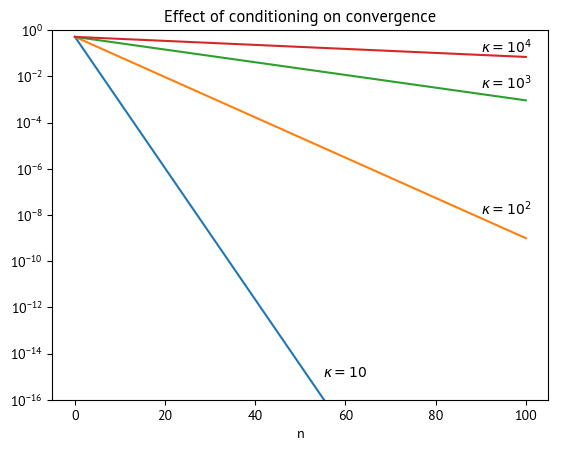

PyObject Text(0.5, 23.0, 'n')

In [3]:
for kappa = [10 100 1000 1e4]
    bound = 2*( (sqrt(kappa)-1)/(sqrt(kappa)+1) ).^(0:100);
    semilogy(0:100,bound*Aerr[1]);
end
ylim(1e-16,1)
text(55,1e-15,L"\kappa=10")
text(90,1e-8,L"\kappa=10^2")
text(90,3e-3,L"\kappa=10^3")
text(90,1e-1,L"\kappa=10^4")
title("Effect of conditioning on convergence")
xlabel("n")

The effect is the same for MINRES and CG, but measured in different terms. In particular, CG does *not* guarantee a nonincreasing residual norm.

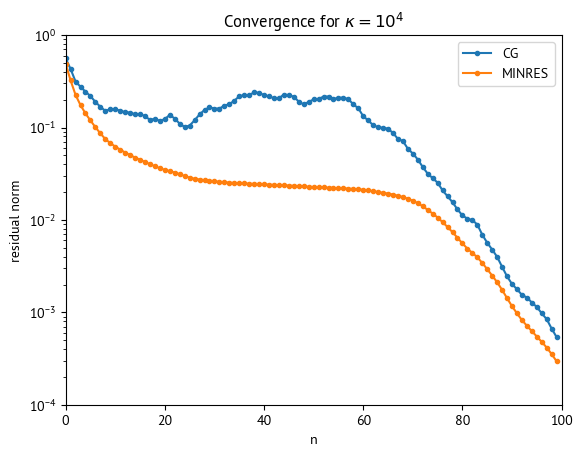

PyObject <matplotlib.legend.Legend object at 0x1332ba208>

In [4]:
kappa = 1e4;
lam = range(1,stop=kappa,length=m)
A = spdiagm(0=>lam)
b = normalize(randn(m))

xCG,hCG = cg(A,b,tol=1e-14,maxiter=100,log=true)
semilogy(hCG[:resnorm],".-")
xMR,hMR = minres(A,b,tol=1e-14,maxiter=100,log=true)
semilogy(hMR[:resnorm],".-")

xlim(0,100);
ylim(1e-4,1);
xlabel("n");
ylabel("residual norm")
title(L"Convergence for $\kappa=10^4$");
legend(["CG","MINRES"])

CG and MINRES are often not much different, practically speaking. MINRES is easier to understand and also works for indefinite problems, while CG has considerably more (or at least better-known) theory behind it.